# Concluding the Exoplanet Composite Discovery Method Predictor

## Preprocessing

**1. Initial Data Handling:**
   - In the preprocessing ipynb, I started by using pandas to read the raw csv, made a copy and displayed the raw csv info.

**2. Handling Missing Values:**
   - Using a missing value threshold of 0, I removed columns that exceeded this threshold. 0 made the most sense as a threshold to simplify model training and reduce problem complexity.

**3. Feature Mapping:**
   - After reducing the number of features, I used the exoplanet archive column mapping csv to map the table name (ex: pl_name) to the Description (ex: Planet name) using a dictionary.
   - Used a for loop through the number of code columns (358) and their definitions, where if row i in the database column matches a column name in the filtered raw data, you assign the key and value to the dictionary, removing trailing and leading whitespaces.
   - Used boolean to confirm we mapped all database column names to their definitions.
   - Then just reassigned the raw data column values (the names) as the values of the dictionary {key:value}.

**4. Dataset Checkpoint:**
   - Checkpoint where we create a copy of the current dataset we are working with.

**5. Analyzing Discovery Methods:**
   - Then I checked unique values in the Discovery Method column in the dataset to get an idea of the discovery methods possible.
   - Using value_count, I got an idea of the frequency of each of the discovery methods in the column. Transit was by far the most frequent.

**6. Addressing Class Imbalance:**
   - Some of the discovery methods only had 10 instances, so I used SMOTE (synthetic minority oversampling technique) to synthetically generate instances of the minority class for a better class balance. This is essential for machine learning models to properly learn how to predict the discovery methods and not just predict the most frequent discovery method.

**7. Dropping Unnecessary Features:**
   - Realized that if I encoded Discovery Facility, Discovery Telescope and Discovery Instrument, there are 70-90 unique values for EACH, so encoding these was determined unfeasable.
   - So I dropped them along with Planet name and Host name, which would be irrelevant to model training.

**8. Simplifying Target Variables:**
   - Then I removed all the one hot binary encoded variables Detected by... columns except for transits.
   - This is because if Detected by Transits is 0, we already know that it has to be one of the other 10 discovery methods.
   - Before doing that, I removed instances of exoplanets that were found by more than one discovery method for more straightforward model training.
   - This was done by summating each of the target dummies for each of the exoplanets, and if the sum was greater than 1 that means it was discovered by more than one method, warranting its removal.
   - After checking the new observation count for each of the Detected by... methods, we dropped the unnecessary Detected by... columns.

**9. Reassessing Class Distribution:**
   - Checking the ratio of Detected by transits to the total number of instances, I saw it transits was roughly 71% of discovery method instances.
   - The new ratio was 50%, implying SMOTE worked as intended (50% exoplanets discovered by Transits, 50% were not).

**10. Standardization:**
   - Then proceeded with standardization; Removed columns that could not be standardized (Discovery Year, Circumbinary Flag, Controversial Flag) and added these after standardizing.
   - Imported StandardScaler function from sklearn preprocessing library and fit the scaler to all the unscaled features.
   - Then applied scaler.transform to all the unscaled features besides the ones excluded above. Checked the shapes of features, targets and the variables we removed, they all must match.
   - Since we used StandardScaler the scaled features are now in numpy array format. To combine it with the other excluded variables, it must first be converted to a pandas dataframe. Then we just added the excluded variables to the new pandas dataframe of the scaled features.

**11. Converting Discovery Year:**
   - Converted discovery year to be treated as a categorical variable for the purposes of this project.

**12. Final Steps:**
   - One last checkpoint (creating copy of the current dataframe we are working with).
   - Finally export the preprocessed dataframe and turn it into a csv to be saved in the current directory.

## XGB Boost ALL Features

**1. Why XGB?:**
   - After the initial preprocessing I got started with the first model I deployed for this analysis.
   - XGBoost was a great first option because it is a powerful implementation of gradient boosting algorithms designed for tabular data.
   - The XGB captures complex patterns in data by combining predictions of multiple weak learners (typically decision trees).

**2. Feature Importance and Data Handling:**
   - XGB also provides clear metrics for feature importance, allowing enhanced understanding of which features most influence the model's predictions. This is useful to my task in predicting exoplanet discovery methods and finding out which features influenced the model to make these predictions.
   - Additionally, XGB handles unbalanced data well. Although we addressed these imbalances in the preprocessing, it is still beneficial that XGB has several techniques to handle imbalanced data, such as scale_pos_weight to assign more weight to the less frequent classes to improve the model's ability to predict them.

**3. Performance and Flexibility:**
   - XGB is also very fast and high performing, as it handles sparse data, uses parallel processing and regularization techniques that prevent overfitting.
   - XGB has flexibility with the feature types, including categorical and continuous features, without needing to extensively preprocess.
   - Finally, XGBoost has been widely adopted in scientific fields like astronomy for its accuracy and robustness in both classification and regression tasks. It is very handy in managing non-linear relationships and interactions between features.

**4. Feature Inclusion and Model Setup:**
   - By including all the features in this XGB model, I aimed to reduce the dimensionality of the problem by identifying which features weighed the most according to the model.
   - Firstly imported the preprocessed data using pandas, and defined my train test split, as well as features and targets (features are all features except the target variable we are predicting, which is detected by transits).
   - Then, I observed feature correlations to observe if there was any moderate to high correlation between variables, which would interfere with model training and performance. Should I have found any notable correlations, that warranted removal of one of them.

**5. Random Seed and Data Splitting:**
   - After this I proceeded to set a random seed for reproducibility using random and numpy libraries. This means every time I set random state to 42 it shuffles the same RANDOM way.
   - Then I actually split the data into training, testing and validation (80% training, 10% testing, 10% validation). This was achieved through 2 separate splits (one to get 80:20, then to get that 20 into 10:10).

**6. Model Training and Evaluation:**
   - Following the split, I used the XGBClassifier class to create my model from the xgb library, with logloss as the evaluation metric. logloss is appropriate because it is very suitable for binary classification problems.
   - Since XGB cannot have "[" or "]" or "<" or ">" characters in the feature names, I used the lambda function to replace these characters with empty spaces.
   - Then I actually fit the model with the new clean training, and validation data, with early stopping = 10 so that if there's no improvement in 10 consecutive trials the model stops to prevent overfitting and to make the overall process more efficient.

**7. Performance Metrics and Validation:**
   - After fitting the model, I used the .predict method on the cleaned test set, so I can see what predictions the model makes on each instance with my own eyes.
   - Evaluation of performance metrics was done using classification report, accuracy score, roc auc score, and a confusion matrix. The actual evaluation was a comparison between the model's predictions and the y_test (the actual values of whether or not this exoplanet was discovered by transits).
   - The XGB Model with all features had an accuracy of a whopping 96.42% on the test set, with an ROC AUC of 98.59%.

**8. Cross-Validation and Feature Importance:**
   - Right after the evaluation metrics, I looked at the K fold cross-validation score using sklearn the library, and declared 5 shuffled folds. I calculated the average cross-validation accuracy (96.77%) and the average cross-validation ROC AUC (99.3%).
   - I wanted to see which features were deemed important by the model so I made a feature importance table, where the importance type is the WEIGHT of the feature. Naturally, this means that I wanted to see which features had the greater weight on the model.
   - After extracting the weights of each of the coefficients from the fitted xgboost model using .get_booster().get_score('weight'), and the feature names from the feature training data, I created a pandas dataframe with the Features and their corresponding importance.
   - Firstly had to turn the feature_importance items into a list, set the columns, and sorted the values based on Importance in descending order.

**9. Visualizing Feature Importance:**
   - I then plotted this feature importance table using matplotlib, and used xgb.plot_importance to directly plot from the xgb model.
   - This plot demonstrates the F score. A higher F score indicates the feature is deemed important by the model.

**10. Refining Feature Set:**
   - For the rest of my models, to reduce dimensionality, I only included features that had an F score of 30 or above. These being:
     - Ecliptic Latitude deg: 271.0
     - Galactic Latitude deg: 250.0
     - Galactic Longitude deg: 223.0
     - Ecliptic Longitude deg: 201.0
     - Discovery Year: 132.0
     - Number of Planets: 78.0
     - Number of Photometry Time Series: 32.0
     - Number of Stars: 20.0


With this new revised list of features, I had a better idea of the features I wanted to train the rest of my models with

# XGBoost REFINED features

**1. Purpose and Rationale:**
   - After training and testing the XGBoost with all features, I trained and tested a new XGBoost model with refined features. The purpose of this is to see if after reducing multi-dimensionality, model performance would be enhanced as the problem becomes less complex.
   - The first time around training and testing the new XGBoost, I had excluded "Number of Stars," but found that model performance suffered every so slightly (test accuracy went down 0.3% from 96.42% to 96.11%), ultimately prompting me to leave it in.

**2. Initial Setup:**
   - The ipynb starts off the same, using pandas to import and read the preprocessed composite CSV.
   - Then, I created a list full of the features I was going to exclude, and used the .drop method to remove them with axis=1 (1 is for columns, 0 is for rows. Makes sense because format is (rows, cols)).

**3. Defining Targets and Features:**
   - After this I defined my targets variable (detected by transits) aka the variable I want my model to predict, while features are everything else (did this by just dropping the targets variable).

**4. Feature Analysis:**
   - Feature analysis includes looking at the correlations so I just used the .corr() method to get a table looking at correlations between variables. For model training, it’s a rule of thumb to avoid multicollinearity.

**5. Correlation Observations:**
   - I observed the following correlations:
     - **Weak:**
       - Ecliptic Latitude and Number of Photometry Time Series: -0.222
       - Number of Photometry Time Series and Discovery Year: -0.253
     - **Moderate:**
       - Galactic Latitude and Ecliptic Latitude: 0.463
       - Galactic Longitude and Ecliptic Latitude: -0.657
       - Galactic Longitude and Ecliptic Longitude: -0.408
       - Ecliptic Latitude and Ecliptic Longitude: 0.498
   - The rest of the feature pairs can be characterized as having very weak correlations.

**6. Random Seed and Data Splitting:**
   - Since none of the feature correlations were excessive, I didn't remove any further variables.
   - Following observing the feature correlations, I set the random seed for 42 once again.
   - I split the data into training, testing, and validation in the same exact way as in the XGBoost model with all features (80:10:10).

**7. Model Creation and Fitting:**
   - The XGBoost was created essentially in the same way as in the ipynb with all features. logloss is still the best evaluation metric for this problem.
   - Similar to the XGBoost with all features, I removed incompatible characters from the features for training, testing, and validation.
   - Then fit the new XGBoost with early stopping rounds = 10 again.

**8. Evaluation of the Refined Model:**
   - After fitting, I wanted to see the actual predictions of the model on the test set again, so I did this with the .predict method on x_test_clean.
   - Looked at the same performance metrics (classification report, accuracy score, roc auc score, and confusion matrix).
   - The Refined XGBoost model had the same accuracy on the test set: 96.42%, with a lower ROC AUC of 98.57%. The reduction is so minuscule it can be considered insignificant.
   - The confusion matrices in both were also exactly the same.

**9. Cross-Validation and Feature Importance:**
   - Same protocol for K-fold cross-validation, but this time the refined model performed a bit worse at 96.67% and a mean CV ROC AUC of 99.25%, both reductions in performance insignificant.
   - The feature importance table looks exactly the same as in the XGBoost with all features, just with different F scores. Both feature tables had more or less the same order and importance ranking for the features, the only difference being Galactic Longitude scoring higher than Galactic Latitude in the XGBoost refined model. Again, this difference (2) is insignificant.

# Logistic Regressison with Refined Features

**1. Purpose and Initial Setup:**
   - Next is the logistic regression. For this model, I used the same feature selection as in my XGBoost model with refined features, for a more straightforward comparison of model performance and logical consistency.
   - The ipynb starts off the same, using pandas to load and read the preprocessed composite CSV.
   - Declared the columns I want to drop in a list, and then used .drop axis =1 to remove them from the dataset.

**2. Checking for Multicollinearity:**
   - Before doing the training and testing split, I checked the Variance Inflation Factor (VIF) between the variables; a measure of how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors. A VIF > 5 indicates high multicollinearity.
   - Using statsmodels library to import variance_inflation_factor and add_constant, I defined my targets and features again.
   - This time, I added a constant to my features to ensure that the model can fit an intercept, allowing for predictions even when all other feature values are 0, and to allow the design matrix to achieve full rank.
   - Creating a dataframe for visual comprehension, I created a Features column using the columns in the features_with_intercept variable, then I created a VIF column using a list comprehension for loop that calls the variance_inflation_factor method on all the values in the features_with_intercept subset, and i for each integer up to the shape of the features_with_intercept subset.
   - The VIF table reveals that all the variables had a VIF less than or equal to 3. VIF values of 4 and 5 are moderate, so none of the features demonstrated moderate to high VIF and warranted removal.

**3. Data Splitting and Random Seed:**
   - Then I observed feature correlations, and set the random seed of 42 once again.
   - After this, I split the data, but this time only into 80:20 (training: testing) instead of 80:10:10 (training, testing, validation) because I deployed GridSearch with cross-validation, which essentially handles the validation portion of our training.

**4. Model Creation and Hyperparameter Tuning:**
   - Following importing the sklearn libraries, I used the LogisticRegression class and sklearn metrics for model evaluation.
   - Expanding a bit on hyperparameter tuning, GridSearch automates finding the optimal hyperparameter process all while validating the model's performance.
   - The hyperparameters to choose from included penalty (lasso regularization or ridge), C (inverse of regularization strength) where smaller values of C imply stronger regularization to prevent overfitting and larger values allow the model to fit the training data more closely, Solver (liblinear is best for smaller datasets and supports l1 and l2 regularization), and max number of iterations.
   - After creating an instance of the LogisticRegression class and storing it in a variable with random_state= 42, I defined my parameter grid with a dictionary that contains all the hyperparameter values I want GridSearch to try and compare.
   - I created an instance of the GridSearch class and tossed in my logistic regression, parameter grid dictionary, number of cross-validations, and accuracy scoring as parameters.
   - Then I fit the grid search object to x_train and y_train.
   - After letting GridSearch look for the optimal parameters, I am able to extract the best parameters using the best_params_ function, and the best model using .best_estimator_.
   - The best hyperparameters as determined by GridSearch were the following:
     - Best hyperparameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}.

**5. Model Evaluation:**
   - Now that I have the best logistic regression model I am ready to deploy the model to make predictions on the test set and store the predictions in a variable.
   - After the predictions, I looked at the performance metrics (classification report, accuracy score, roc auc score, and confusion matrix).
   - These performance metrics revealed the logistic regression model with the optimal hyperparameters has an 85.25% accuracy on the test set, with a 92.66% roc auc score on the test set. Although not better than the XGBoost models, the logistic regression performed decently.

**6. Feature Importance:**
   - Then I decided to create a summary table with coefficients (weights) and intercept (bias) to get an idea of which variables were important to the model.
   - After using .intercept_ and .coef_ methods to derive the bias and weights of each of the variables and matching up coefficients with the features, I transposed the coefficients numpy array to be interpreted as columns instead of rows (the default).
   - Finally, I inserted the intercept in the 0th index and moved all indices up by 1.

**7. Log Odds Calculation:**
   - Now that I have the bias and weights lined up, I decided to calculate log odds of each of the variables for a more enhanced understanding of their relationship with the target variable. Log odds can be calculated by taking the natural log of each of the weights e^x where x is the weight.
   - A feature is deemed not important if its coefficient is near 0, and if log odds are near 1 (because e^0 is 1).

**8. Important Features and Insights:**
   - The feature summary table reveals the following features as important:
     - Feature Name | Coefficients | Odds_ratio
     - Ecliptic Latitude [deg] | 1.691207 | 5.426025
     - Number of Planets | 0.426255 | 1.531511
     - Ecliptic Longitude [deg] | 0.424376 | 1.528636
     - Galactic Longitude [deg] | 0.347762 | 1.415895
   - The following variables had a negative weight and log odds less than 1:
     - Galactic Latitude [deg] | -0.147981 | 0.862447
     - Number of Stars | -0.210578 | 0.810116
     - Number of Photometry Time Series | -4.216848 | 0.014745
   - When log odds is less than 1, it means for every additional unit of that feature, the odds of detecting an exoplanet by transits decreases. In the case of "Number of Photometry Time Series" for example, the odds decrease by approximately 98.53% (1 - 0.0147 = 0.9853).

# Deep Neural Network

**1. Initial Setup and Library Imports:**
   - The DNN ipynb starts off the same, importing the relevant libraries. Since I am incorporating a Deep Neural Network, I imported TensorFlow for Keras operations and Optuna for hyperparameter optimization.
   - Loaded and read the preprocessed exoplanet composite CSV using pandas; removed unimportant features according to the XGBoost model.
   - Defined my targets and my features.
   - Observed feature correlations and set the random seed to 42 once again.
   - Split the data following the 80:10:10 (training: testing: validation) split.

**2. Data Conversion and Model Preparation:**
   - Since I used TensorFlow, I had to convert the DataFrame into a numpy array since TensorFlow models expect data in the form of a numpy array.
   - Defined a function that returns the numpy array form of the parameter passed, and a list with all the data splits for x and y.
   - Using list comprehension, I called the converter function for each split in the list of data splits; the result is data splits of the proper type.

**3. Importing Necessary Tools:**
   - Imported further tools:
     - Sequential helps build the DNN by grouping a linear stack of layers into a model.
     - Dense is important for densely connected neural network layers.
     - Adam is the optimizer of choice.
     - ReduceLROnPlateau helps optimize the learning rate by lowering it once learning stops improving (LR scheduler).
     - TFKerasPruningCallback is vital for the actual training portion as it checks for pruning conditions every epoch.
     - KFold is for cross-validation purposes.

**4. Building the DNN:**
   - First declared the input and output size; input layer is equal to the number of features (10, which can be accessed using the shape of x_train which is in the format (rows, cols)) and output is equal to the number of predictions expected by the model (1). There are 2 possible classifications in this binary problem: 1 means detected by transits, 0 means not detected by transits but by another method. The DNN will ultimately calculate the probability that the exoplanet is a case of class 0 or class 1, so it is essentially 1 output.
   - Defined a create_dnn function that takes the trial number as a parameter (trial number is based on Optuna) and its job is to create a new deep neural network for that trial number (each trial has a different combination of hyperparameters).
     - The function defines the units (number of neurons) first and uses trial suggest int method to get an integer between the two bounds, in this case 10 and 100 with steps = 5 (integers can only be multiples of 5) and sets that as the number of neurons for that trial.
     - Dropout rate follows the same logic, but now trial suggests a float between 0.0 and 0.5 with steps of 0.05 at a time. Dropout rate is the frequency at which neurons are randomly dropped during training.
     - Similarly, learning rate follows the same logic. The bounds are 1e-5 to 1e-2 with 0.05 as the step quantity. Log scale is set to true for a better search.

**5. Creating the DNN Structure:**
   - Built the DNN using the Sequential class.
     - First layer is the input layer, so I used keras.layers.Dense to create a densely connected layer and input_layer variable for the input_shape parameter. I used Rectified Linear Unit (ReLU) as the activation function because ReLU mitigates the vanishing gradient problem. The number of neurons is just the units variable.
     - Then I implemented the dropout rate using keras.layers.Dropout.
     - I only created one hidden layer of neurons because two lowered the validation accuracy significantly; one was enough to pick up the patterns and make generally valid predictions.
     - Following the Dropout line, I created my output layer with sigmoid activation because sigmoid transforms the input into probabilities of 0 and 1 and has a clear threshold for decision making.

**6. Defining the Objective Function:**
   - Defined my objective function which takes the trial number as a parameter.
     - First, I defined kfold cross-validation using the imported KFold class with number of splits = 5 (the number of splits made on the data where each fold is used once as a validation set while the other 4 are used for training), shuffling as True, and random_state as 42.
     - Since I used a cross-validation loop, I stored the validation accuracies in a list. The logic here was to take the average across all 5 folds as the cross-validation accuracy.
     - For each train index and validation index in the k-folded x_train numpy array, I defined the train fold and validation fold using these indices for both x and y.
     - Within the loop, I called the create_dnn function with the corresponding trial number and stored it in the model variable. I used trial to suggest integers for both epochs (bounds 5 to 50 with steps quantity = 5) and batch size (bounds 5 to 30 with steps quantity = 5).
     - Also used trial to suggest floats for patience (training periods the learning rate scheduler will wait before lowering the learning rate; helps avoid performance plateaus; bounds 2 to 10 with steps quantity = 1) and factor (the factor at which the learning rate will be multiplied; bounds 0.1 to 0.5 with steps quantity = 0.1).
     - Then I defined the learning rate scheduler variable, using the ReduceLROnPlateau with the metric we want to monitor being validation accuracy, patience and factor as defined above, and the minimum learning rate as 1e-7.
     - Started the model training, fitting the created DNN and tossing in numpy arrays x_train, y_train, epochs, batch size, and the validation data as parameters.
     - Incorporating TFKerasPruningCallBack checks on model progress and saves time and resources by stopping the training if the validation accuracy is too poor to continue.
     - Verbose=2 reduces output clutter.
     - After training, the validation accuracy values are stored in the training.history object, so I used the max() function to extract the greatest value and append this value to the list containing the validation accuracies for the current fold.
     - Once the loop is complete, we return the mean of the validation accuracies in the list.

**7. Hyperparameter Optimization with Optuna:**
   - Used Optuna to create a study (actually start the trials and hyperparameter optimization process) with the direction being to maximize validation accuracy.
   - Used the optimize method, tossing in the objective function (which helps us optimize validation accuracy) and setting the number of trials = 200 (enough considering the size of the composite dataset) to commence training.
   - After all 200 trials, I extracted the best trial value (the best validation accuracy achieved ~ 87.63%) and best trial parameters ({'units': 100, 'dropout': 0.1, 'learning_rate': 0.007511080260178754, 'epochs': 50, 'batch_size': 30, 'patience': 6, 'factor': 0.4}).
   - These best values were stored in a best_params variable.

**8. Training the Optimal DNN:**
   - With the new optimal hyperparameters, I proceeded to train a new DNN with these values.
   - Essentially created the same structure but used the best_params variable with [parameter] as the key (ex: best_params['units']) and everything else (activation, input shape, output size, activation, optimizer, loss, metrics, and LR scheduler) remained the same.
   - Afterwards, I finally fit the best model and used the .evaluate method to analyze the test loss and test accuracy which came out to 0.4778 and 84.63% respectively.

**9. Model Predictions and Evaluation:**
   - Using the .predict method, I made the best DNN make actual predictions on the test set, where the model outputs the probability for the binary class and converts it into a final prediction of 0 or 1 with a threshold of 0.5 (for example, a 0.45 chance it is 0, 0.55 chance it is 1, the model interprets it as 1).
   - After deriving the probabilities and converting them into integers, I imported evaluation metrics (classification report, accuracy score, roc_auc score, confusion matrix) and matplotlib for visual comprehension.

**10. Evaluation Results:**
   - This was the confusion matrix I got:
     - [[274  60]
     -  [ 39 271]]
   - The DNN accuracy on the test set was 0.846, with an ROC AUC score of 93.57%, meaning if you randomly choose one instance of 0 and one instance of 1, there is a 93.57% chance the model will correctly identify which is which.

**11. Training and Loss Visualization:**
   - Plotting the validation and training accuracy over the epochs, we generally see the trend we expect to see; as the epochs increase, the lines rise and stabilize near a certain accuracy, in this case, 0.846.
   - Next, I plotted the loss over the epochs; a primary goal of machine learning model training is to minimize loss over time. This is the trend we see as the first few epochs had extremely high loss, but the curve shoots down to a loss of almost 0 and behaves as expected with a good learning rate.

**12. Feature Importance Analysis:**
   - Finally, I put the DNN feature importance in a table. After getting the weights from the input layer, I calculated the importance of each feature by summing the absolute values of these weights across all neurons in the first hidden layer. This gives a measure of how much each feature contributes to the predictions made by the model.
   - I then normalized the importance values so that the features could be compared on a relative scale. I created a DataFrame and put the values there.
   - By normalized weight, these are the top 4 features with the most influence on the model:
     - Feature | Normalized Weight
     - Number of Photometry Time Series | 0.252339
     - Ecliptic Latitude [deg] | 0.216743
     - Ecliptic Longitude [deg] | 0.168281
     - Galactic Longitude [deg] | 0.078873
   - Finally, I plotted the feature importance table on a graph for enhanced visual presentation.

# MODEL PERFORMANCE SUMMARY TABLE

In [13]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

models_performance = {
    'XGB All Features': ['80:10:10', '96.42%', '98.59%', '96.77%', '99.3%', 
                         ['Ecliptic Latitude', 'Galactic Latitude', 'Galactic Longitude', 'Ecliptic Longitude', 'Discovery Year']],
    'XGB Refined Features': ['80:10:10', '96.42%', '98.57%', '96.67%', '99.25%', 
                             ['Ecliptic Latitude', 'Galactic Longitude', 'Galactic Latitude', 'Ecliptic Longitude', 'Discovery Year']],
    'Logistic Regression': ['80:20', '85.25%', '92.66%', 'N/A', 'N/A', 
                            ['Ecliptic Latitude', 'Number of Planets', 'Ecliptic Longitude', 'Galactic Longitude', 'Number of Photometry Time Series']],
    'Deep Neural Network': ['80:10:10', '84.63%', '93.57%', 'N/A', 'N/A', 
                            ['Number of Photometry Time Series', 'Ecliptic Latitude', 'Ecliptic Longitude', 'Galactic Longitude']]
}

model_table = pd.DataFrame.from_dict(models_performance, orient='index', 
                                     columns=['Split', 'Test accuracy', 'Test ROC AUC', 'Cross-Validation accuracy', 
                                              'Cross-Validation ROC-AUC', 'Important Features'])

model_table


Split Test accuracy Test ROC AUC  \
XGB All Features      80:10:10        96.42%       98.59%   
XGB Refined Features  80:10:10        96.42%       98.57%   
Logistic Regression      80:20        85.25%       92.66%   
Deep Neural Network   80:10:10        84.63%       93.57%   

                     Cross-Validation accuracy Cross-Validation ROC-AUC  \
XGB All Features                        96.77%                    99.3%   
XGB Refined Features                    96.67%                   99.25%   
Logistic Regression                        N/A                      N/A   
Deep Neural Network                        N/A                      N/A   

                                                                                                                    Important Features  
XGB All Features                        [Ecliptic Latitude, Galactic Latitude, Galactic Longitude, Ecliptic Longitude, Discovery Year]  
XGB Refined Features                    [Ecliptic Latitude, Galactic Longitude, Galactic Latitude, Ecliptic Longitude, Discovery Year]  
Logistic Regression   [Ecliptic Latitude, Number of Planets, Ecliptic Longitude, Galactic Longitude, Number of Photometry Time Series]  
Deep Neural Network                      [Number of Photometry Time Series, Ecliptic Latitude, Ecliptic Longitude, Galactic Longitude]

# Test accuracy by model

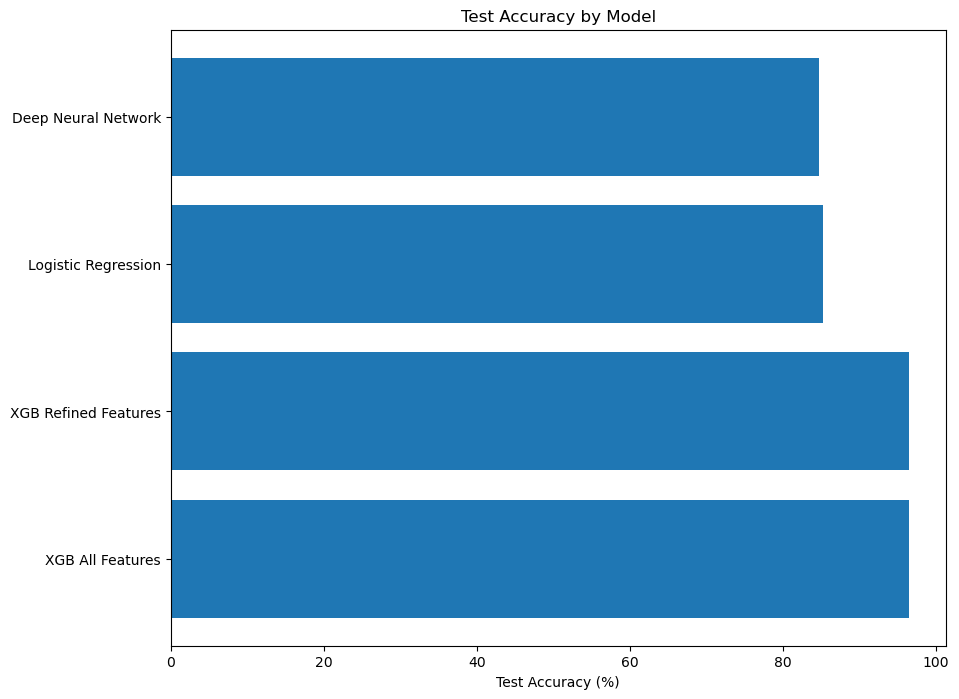

In [15]:
import matplotlib.pyplot as plt

model_test_accuracy = model_table['Test accuracy'].str.rstrip('%').astype('float')

plt.figure(figsize=(10, 8))
plt.barh(list(models_performance.keys()), model_test_accuracy)
plt.xlabel('Test Accuracy (%)')
plt.title('Test Accuracy by Model')
plt.show()

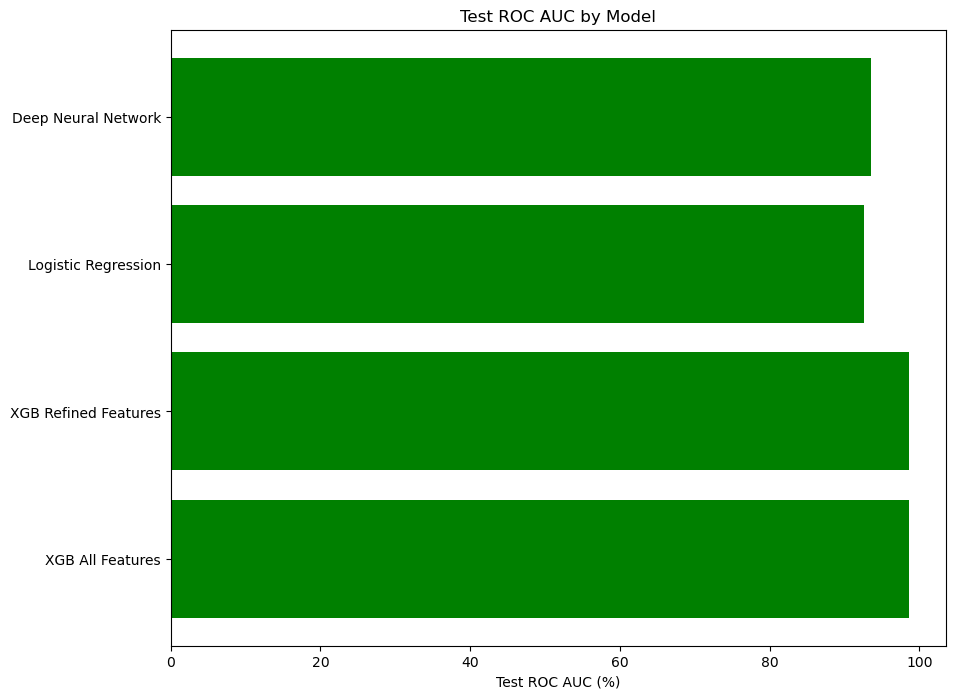

In [16]:
import matplotlib.pyplot as plt

model_roc_auc = model_table['Test ROC AUC'].str.rstrip('%').astype('float')

plt.figure(figsize=(10, 8))
plt.barh(list(models_performance.keys()), model_roc_auc, color='green')
plt.xlabel('Test ROC AUC (%)')
plt.title('Test ROC AUC by Model')
plt.show()

# Contextual Interpretation

### Both XGB models suggest that positional data (ecliptic and galactic coordinates) plays a critical role in detecting exoplanets by the transit method, likely due to the necessity of specific orbital alignments. Discovery year highlights the importance of technological advancements in improving the detection capabilities of the transit method over time.

**Exoplanet Detection by Transits:**
- The transit method relies on detecting the slight dimming of a star as an exoplanet passes in front of it. The effectiveness of this method is influenced by the alignment of the exoplanet's orbit with the observer's line of sight, which is why positional coordinates like ecliptic and galactic latitude/longitude are so important. This also explains why Photometry Time Series and Number of planets are valued significantly in some of the models.

**Ecliptic Latitude:**
- Ecliptic latitude is the position of the exoplanet relative to the ecliptic plane, which is the apparent path of the Sun on the celestial sphere. A high ranking of importance for this feature suggests that the position of an exoplanet relative to this plane is crucial for detecting it via transits. This is sensible because transit detection is easier when the orbital plane of the exoplanet is aligned with the line of sight from Earth, which is more likely near the ecliptic plane.

**Galactic Longitude:**
- Galactic longitude refers to the position of the exoplanet within the Milky Way. This feature's high importance indicates that certain regions of the galaxy are more conducive to detecting exoplanets by transits, possibly due to the density of stars or observational strategies that focus on specific regions of the galaxy.

**Galactic Latitude:**
- Similar to galactic longitude, galactic latitude describes the exoplanet's position relative to the galactic plane. The importance of this feature suggests that exoplanet detection via transits might be more successful in particular regions of the galaxy, such as near the galactic plane where star density is higher, thus increasing the likelihood of observing a transit.

**Ecliptic Longitude:**
- Ecliptic longitude, like ecliptic latitude, is another coordinate that describes the position of the exoplanet in the sky. Its importance in the model implies that the specific positioning relative to the ecliptic plane has a significant impact on the ability to detect transits.

**Discovery Year:**
- The discovery year being an important feature reflects the improvements in technology and observational techniques over time. As methods for detecting transits have advanced, the ability to discover exoplanets using this method has likely improved with it.
    
- The importance of Discovery Year suggests that as detection technology has improved, particularly with missions like Kepler and TESS, the ability to detect exoplanets using the transit method has also increased. This makes sense because of historical trends in exoplanet discovery, where a large amount of transit detections followed the launch of these missions.

**Photometry Time Series and Transit Detection**: 
- In the context of exoplanet detection, photometry time series refer to the sequential measurements of a star’s brightness over time. The transit method detects exoplanets by observing dips in a star’s brightness when a planet passes in front of it.
  
- The negative coefficient and low odds ratio might seem counterintuitive, as more data typically helps in detection. This could indicate that an increased number of photometry time series might be correlated with noisier or less conclusive data, where the signal (i.e., the transit) is harder to detect. It might also reflect situations where increased observations are necessary because the initial data is inconclusive, thus reducing the likelihood of a clear detection.

- This result suggests that in the context of the NASA composite dataset, having a larger number of photometry time series does not necessarily improve the likelihood of detecting exoplanets via transits. It highlights the importance of data quality over quantity, where fewer, higher-quality observations might be more effective than a larger number of lower-quality ones.
     
- This finding could imply that the focus should be on optimizing observational strategies to ensure that each photometry time series is as informative as possible, rather than simply increasing the number of observations.

**Number of Planets**
- The coefficient for "Number of Planets" in the logistic regression model is **0.426255**. In logistic regression, the coefficient represents the change in the log-odds of the target variable (in this case, exoplanet detection by transits) for a one-unit increase in the predictor variable, holding all other variables constant.
  
- A positive coefficient means that as the number of planets increases, the log-odds of detecting an exoplanet by transits also increase. In simpler terms, more planets in a system slightly increase the likelihood that an exoplanet will be detected using the transit method.

- The odds ratio for "Number of Planets" is **1.531511**. The odds ratio is the exponentiation of the coefficient (`exp(0.426255) = 1.531511`).
  
- This odds ratio means that for each additional planet in a system, the odds of detecting an exoplanet by transits increase by a factor of approximately **1.53**. In practical terms, if the number of planets in a system increases by one, the likelihood of detecting an exoplanet using the transit method increases by 53%.

- The transit method of detecting exoplanets relies on observing the dimming of a star as a planet passes in front of it, from the observer’s perspective. This method is effective in multi-planet systems because more planets increase the chances that at least one will have an orbit aligned with the observer's line of sight.
  
- This makes sense because systems with more planets are more likely to exhibit multiple transits, increasing the number of opportunities for detection. This can explain why the logistic regression model associates a higher number of planets with an increased likelihood of detection by the transit method, and aligns well with the principles of how transit detection works.